In [1]:
images_path = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

## 1. Exctract Classes From Directories <a class="anchor"  id="chapter1"></a>

Fish images in the dataset are classified in 9 classes. The code below is used to extract these classes.

In [2]:
import os
classes = [i for i in os.listdir(images_path) if '.' not in i] 
print (classes)

['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']


## 2. Reading Images as Dataframe  <a class="anchor"  id="chapter2"></a>

Given image path, the code below read the full path of the image file and determine the class of the fish image from the directory the file is stored.

In [3]:
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt

images_path = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
ext = ['JPG', 'jpeg', 'png', 'jpg', 'gif', 'webp']

# Create a pandas dataframe
df = pd.DataFrame(columns = [ 'Fullpathname','Filename','Class'])

def load_data(df, images_path):
    for dirname, _, filenames in os.walk('/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'):
        for filename in filenames:
            classname = os.path.split(dirname)[-1]
            if filename.endswith(".png") and "GT" not in  classname   :
                fullpathname = os.path.join(dirname,filename)
                df.loc[len(df.index)] = [fullpathname,filename, classname]

load_data(df, images_path)


print(df.head())
print(df["Class"].head())
print(df.info())

                                        Fullpathname   Filename  \
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  00929.png   
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  00704.png   
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  00562.png   
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  00237.png   
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  00406.png   

             Class  
0  Hourse Mackerel  
1  Hourse Mackerel  
2  Hourse Mackerel  
3  Hourse Mackerel  
4  Hourse Mackerel  
0    Hourse Mackerel
1    Hourse Mackerel
2    Hourse Mackerel
3    Hourse Mackerel
4    Hourse Mackerel
Name: Class, dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 8999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Fullpathname  9000 non-null   object
 1   Filename      9000 non-null   object
 2   Class         9000 non-null   object
dtypes: object(3)
memory usa

## 3. Show Images In Dataframe  <a class="anchor"  id="chapter3"></a>

The images are shown in tight layput of (n*5) by using Image class from PIL library.

Number of Classes : 9


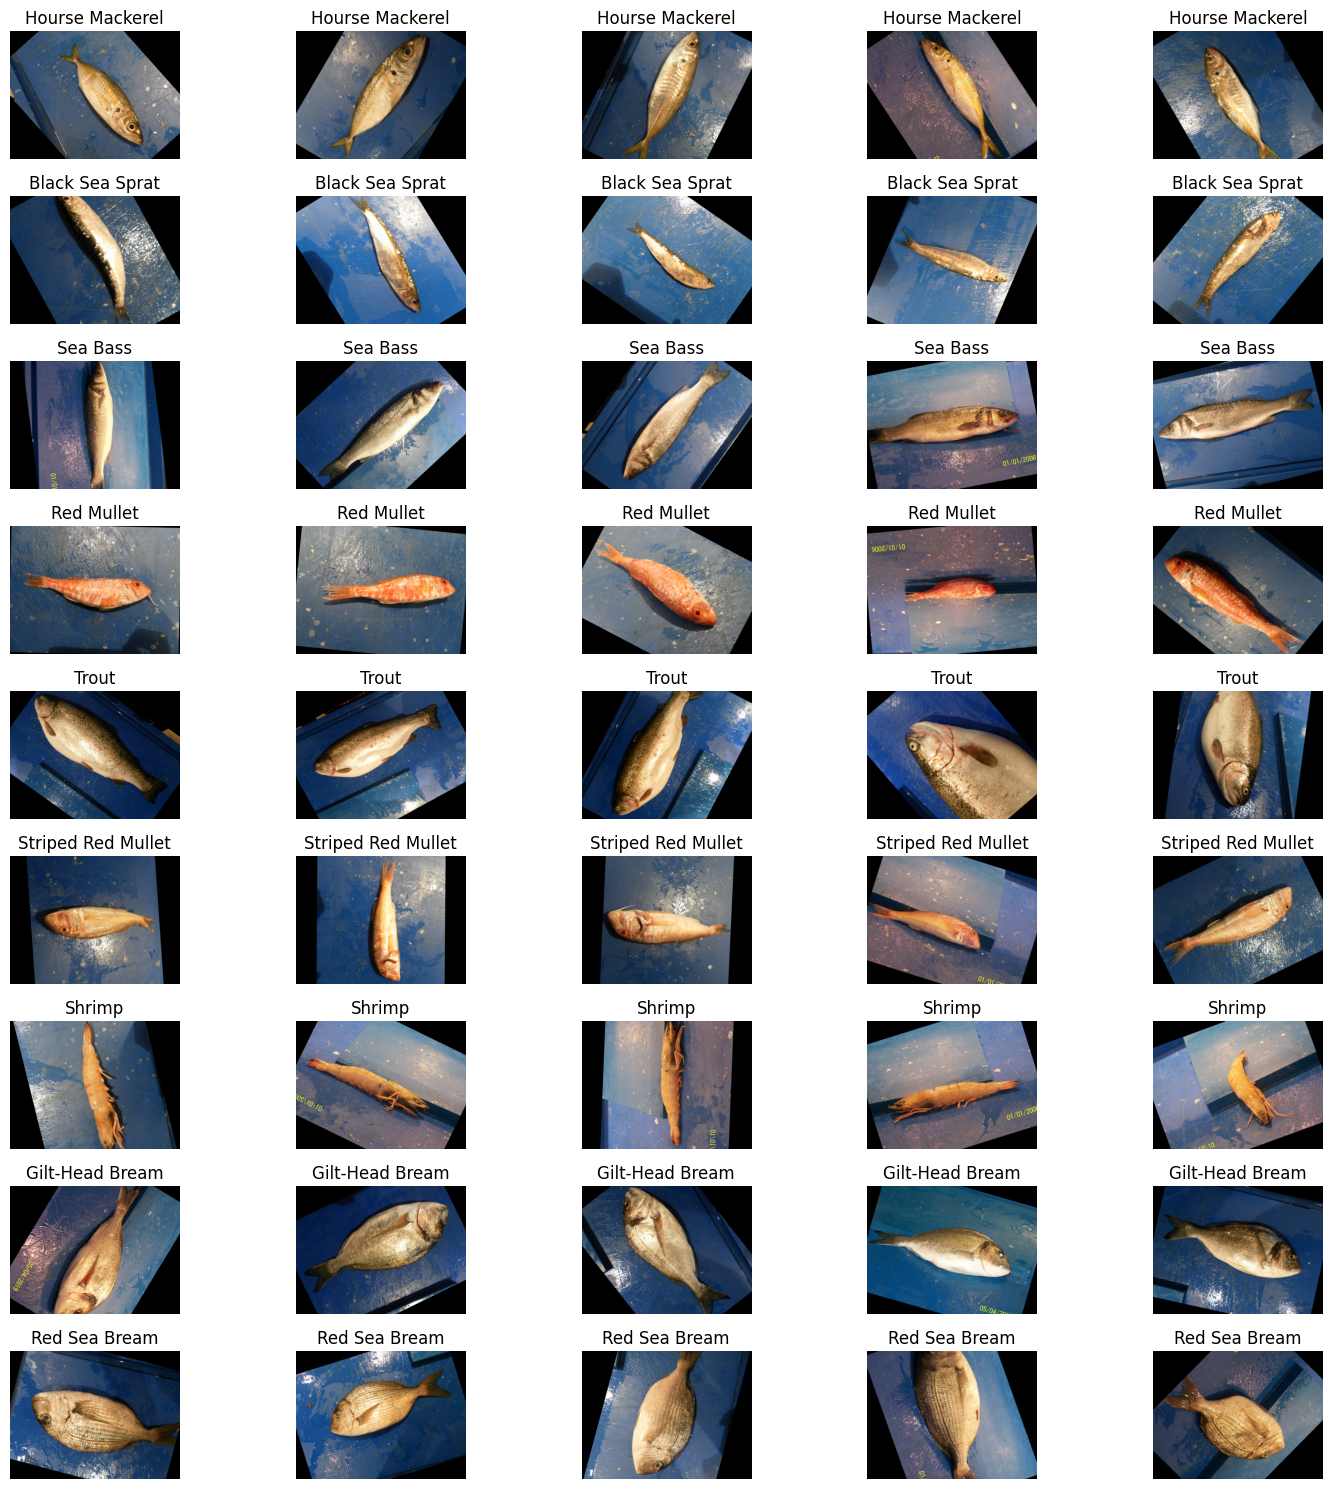

In [4]:
from PIL import Image
classes = [i for i in os.listdir(images_path) if '.' not in i] 
rowlength = len(classes)
print("Number of Classes : " + str(rowlength))

roundig, axes = plt.subplots(rowlength, 5, figsize=(15, 15))
axes = axes.flatten()

#print (axes)
sample_images = []
sample_labels = []

for cindex, cValue in enumerate(classes):
    for index, row in df[df.Class == cValue].head(5).iterrows():    
        sample_images.append(row['Fullpathname']);
        sample_labels.append(cValue)
        
for img_path, ax, label in zip (sample_images,axes, sample_labels):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')
    
plt.tight_layout()
plt.show()
        
    

## 4. Graphical Representation Of Dataset  <a class="anchor"  id="chapter4"></a>

The dataset are visualized by the statistical analysis of counting against class of image. The analysis are showwn below by bar piot from seaborn library.

## <font style=" margin-left: -33px">&#160;&#160;&#160;&#160;&#160;4.1. Represented As Bar Graphics <a class="anchor"  id="chapter4.1"></a>

                Class  Count
0     Black Sea Sprat   1000
1     Gilt-Head Bream   1000
2     Hourse Mackerel   1000
3          Red Mullet   1000
4       Red Sea Bream   1000
5            Sea Bass   1000
6              Shrimp   1000
7  Striped Red Mullet   1000
8               Trout   1000


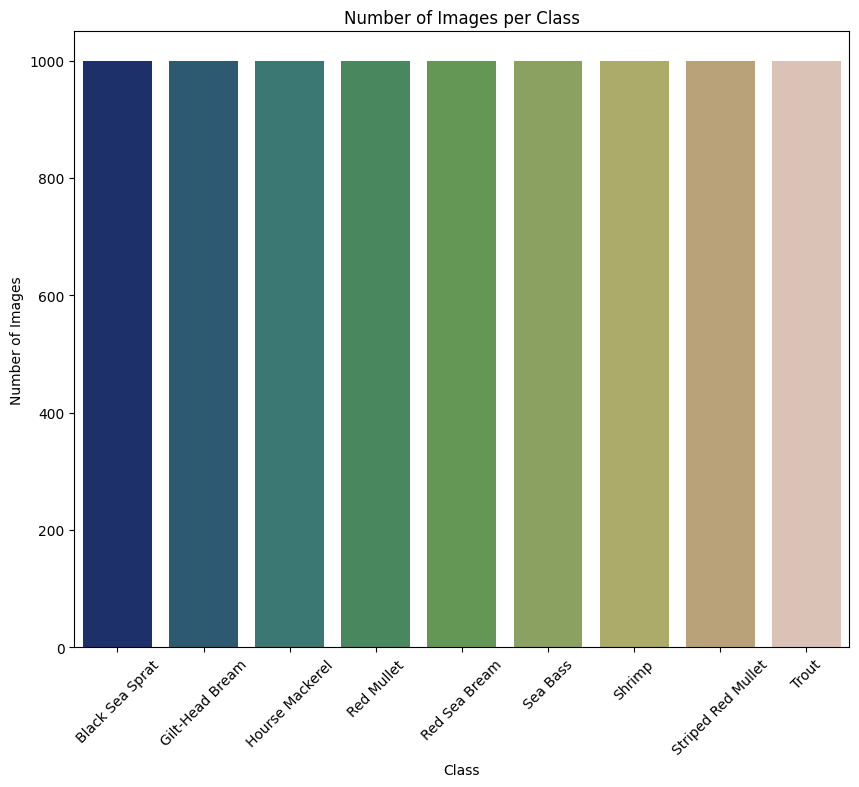

In [5]:
import seaborn as sns

class_names = [i for i in os.listdir(images_path) if '.' not in i] 

dfCount = df[df['Class'].str.contains('GT') == False].groupby(['Class'])['Class'].count().reset_index(name="Count")
print(dfCount)



plt.figure(figsize=(10,8))
sns.barplot(data=dfCount, x='Class', y='Count', palette='gist_earth')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()




## <font style=" margin-left: -33px">&#160;&#160;&#160;&#160;&#160;4.2. Represented As Donut Graphics <a class="anchor"  id="chapter4.2"></a>


                Class  Count
0     Black Sea Sprat   1000
1     Gilt-Head Bream   1000
2     Hourse Mackerel   1000
3          Red Mullet   1000
4       Red Sea Bream   1000
5            Sea Bass   1000
6              Shrimp   1000
7  Striped Red Mullet   1000
8               Trout   1000


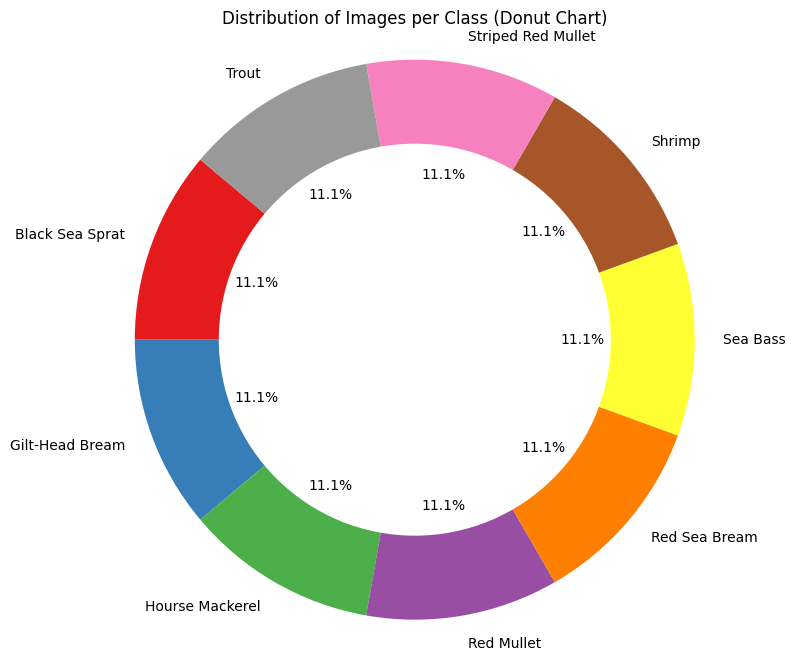

In [6]:
import seaborn as sns

class_names = [i for i in os.listdir(images_path) if '.' not in i] 

dfCount = df[df['Class'].str.contains('GT') == False].groupby(['Class'])['Class'].count().reset_index(name="Count")
print(dfCount)


plt.figure(figsize=(10,8))
plt.pie(dfCount['Count'], labels=dfCount['Class'], autopct='%1.1f%%', startangle=140,colors=sns.color_palette("Set1", len(class_names)))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Images per Class (Donut Chart)')
plt.show()


## 5. Create Train and Test Dataset  <a class="anchor"  id="chapter5"></a>

In [7]:
img_height= 64 
img_width = 64
batch_size = 32

The dataset is splitted into two parts; 80% of data for training, %2p0 of data for validation.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)  # %80 of data is traning data while 20% is test data

## <font style=" margin-left: -33px">&#160;&#160;&#160;&#160;&#160;5.1. Create Train Data Generator <a class="anchor"  id="chapter5.1"></a>

In [9]:
train_generator = train_datagen.flow_from_directory(
    directory=images_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical')


Found 14400 images belonging to 9 classes.


## <font style=" margin-left: -33px">&#160;&#160;&#160;&#160;&#160;5.2. Create Validation Data Generator <a class="anchor"  id="chapter5.2"></a>

In [10]:
validation_generator = train_datagen.flow_from_directory(
    directory=images_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical')

Found 3600 images belonging to 9 classes.


## <font style=" margin-left: -33px">&#160;&#160;&#160;&#160;&#160;5.3. Visualization of Train and Validation Data<a class="anchor"  id="chapter5.3"></a>

Five images from training data is showed below in tigh layout.

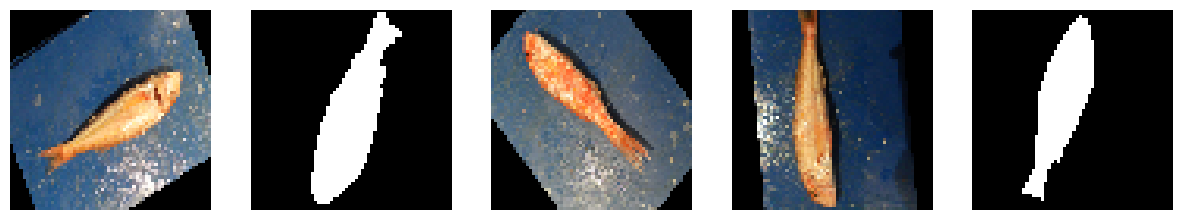

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the training generator
x_batch, y_batch = next(train_generator)

# Set up the plot
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):  # Show 5 images
    ax = axes[i]
    ax.imshow(x_batch[i])  # Show the image
    ax.axis('off')  # Hide axes
plt.show()


Five images from validation data is showed below in tigh layout.

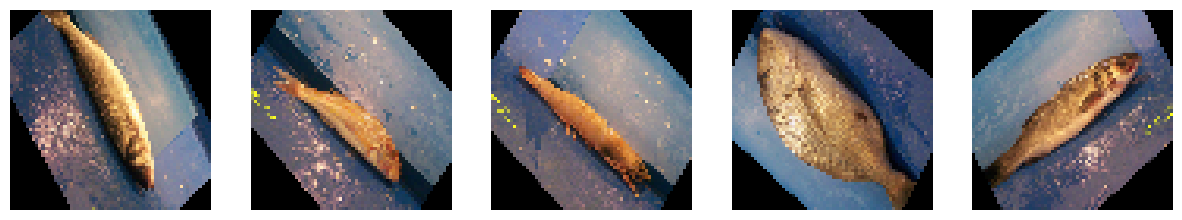

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the training generator
x_batch, y_batch = next(validation_generator)

# Set up the plot
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):  # Show 5 images
    ax = axes[i]
    ax.imshow(x_batch[i])  # Show the image
    ax.axis('off')  # Hide axes
plt.show()

## 6. Define ANN Model  <a class="anchor"  id="chapter6"></a>

The ANN model used in analysis is defined below. 
The model accepts input of image arrray of 64*64 resoluetion. 
This image resolution is acquired by the image data generation process.
As seen in the code below, sequential model from keras library is used. 
These model is designed by consecutive layers 
which are different functions.

Firstly, Input Layer is used. This layer states the input shapes accepted by the model.
Secondly, Flatten Layer is used. This layer converts the multi dimensional array into one dimensional array.
Third layer, Dense layer is fully connected layer and uses RELU activation functions. It provides and reinforced the training.
Fourth layer, Batch Normalization layer normalizes input values for consecutive layers and stibilizes the model.
Fifth layer, Dropout layer prevents overfitting in the model by deactivating neurons during training processes.
Sixth layer, Batch Normalization layer again an the last, normalizes input values.
Seventh layer is Dense layer again. In this model, there are five dense layers. These increase training quality and model durability.
Eight layer is Dropout layer again. One Dropout layer is used after each Dense layer for preventing overfitting.
The last Dense layer, output layer used Softmax activation functions as different from other dense layers. Softmax activation function try to determine the class value for multiclass classification by using probability  




In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization,Input
model = Sequential([   
    Input(shape=(img_height, img_width, 3)),
    Flatten(),  # Flatten image

    Dense(512, activation='relu'),  # Big fully connected layer
    BatchNormalization(),  # Batch normalization
    Dropout(0.5),  # Dropout

    Dense(256, activation='relu'),  # Second big layer
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),  # Third Layer
    Dropout(0.3),

    Dense(64, activation='relu'),  # Fourth Layer
    Dropout(0.2),

    Dense(len(class_names), activation='softmax')  # Multi class output layer
])


## 7. Compile ANN Model  <a class="anchor"  id="chapter7"></a>

ANN model is compiled by code below. Now, it is prepared to be used.

In [14]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

## 8. Model Summary  <a class="anchor"  id="chapter8"></a>

Model summary command show the layered representation of the model.

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,468,105 (24.67 MB)

 Trainable params: 6,466,569 (24.67 MB)

 Non-trainable params: 1,536 (6.00 KB)

## 9. Train The Model  <a class="anchor"  id="chapter9"></a>

Model is trained through 32 epochs with batch-size of 32. The results are gained by the accuracy value of 0.7399 and the loss values: 0.7078

In [16]:
import tensorflow as tf

history = model.fit(
        train_generator,
        epochs=32,
        validation_data=validation_generator)

Epoch 1/32


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 220s 475ms/step - accuracy: 0.2313 - loss: 2.1399 - val_accuracy: 0.2917 - val_loss: 1.9301
Epoch 2/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 132s 290ms/step - accuracy: 0.3647 - loss: 1.6263 - val_accuracy: 0.4214 - val_loss: 1.5798
Epoch 3/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 133s 292ms/step - accuracy: 0.4329 - loss: 1.4799 - val_accuracy: 0.4969 - val_loss: 1.4776
Epoch 4/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 300ms/step - accuracy: 0.4740 - loss: 1.3587 - val_accuracy: 0.5003 - val_loss: 1.4174
Epoch 5/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 132s 290ms/step - accuracy: 0.5017 - loss: 1.3094 - val_accuracy: 0.3967 - val_loss: 1.9903
Epoch 6/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 130s 287ms/step - accuracy: 0.5229 - loss: 1.2618 - val_accuracy: 0.5817 - val_loss: 1.2412
Epoch 7/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 130s 287ms/step - accuracy: 0.5469 - loss: 1.1973 - val_accuracy: 0.5664 - val_loss: 1.2907
Epoch 8/32
450/450 ━━━━━━━━━━━━━━━━━━━━ 131s 287ms/step - accuracy: 0.5651 - loss: 1.15

## 10. Evaluate The Model With Test DataSet  <a class="anchor"  id="chapter10"></a>

The model is evaluated by the validation data and accuracy andd loss metric values are shown below. As it is seen below, the calculated values shown below are acceptable.

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 367ms/step - accuracy: 0.7588 - loss: 0.8667
Validation loss: 0.887843132019043
Validation accuracy: 0.7572222352027893


The graphical representation of accuracy and loss are shown below.

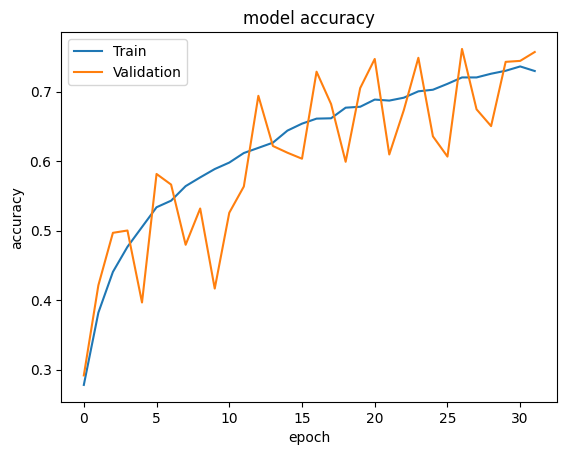

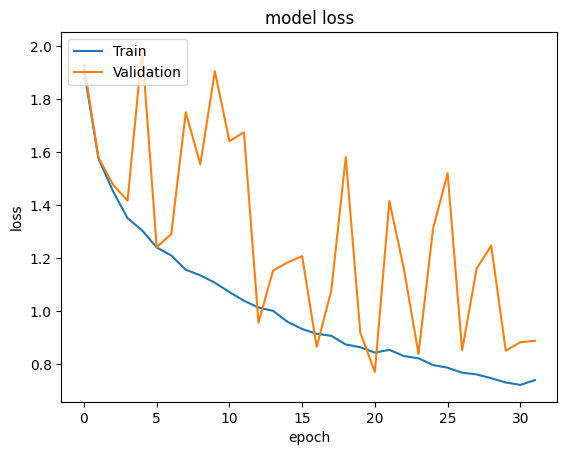

In [18]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 11. Hyperparameter Tuning  <a class="anchor"  id="chapter11"></a>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization,Input
from tensorflow.keras.optimizers import Adam 
def create_model(hp):

    # Create your binary classification model
    
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    activation = hp.Choice('activation', ['relu'])
    
    model = Sequential([   
        Input(shape=(img_height, img_width, 3)),
        Flatten(),  # Flatten image
    
        Dense(512, activation=activation),  # Big fully connected layer
        BatchNormalization(),  # Batch normalization
        Dropout(0.5),  # Dropout
    
        Dense(256, activation=activation),  # Second big layer
        BatchNormalization(),
        Dropout(0.4),
    
        Dense(128, activation=activation),  # Third Layer
        Dropout(0.3),
    
        Dense(64, activation=activation),  # Fourth Layer
        Dropout(0.2),
    
        Dense(len(class_names), activation='softmax')  # Multi class output layer
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),  # Use float value of learning_rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model
    
    

## <font style=" margin-left: -33px">&#160;&#160;&#160;&#160;&#160;11.1. Setup The Hyperparameter Model <a class="anchor"  id="chapter11.1"></a>


In [20]:
import keras_tuner as kt
tuner = kt.RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=5,  # Number of models to try
    executions_per_trial=2,  # Evaluate each model twice
    directory='my_dir',
    project_name='image_classification'
)

tuner.search(
    train_generator,
    validation_data=validation_generator,
    epochs=5
)

Trial 5 Complete [00h 22m 18s]
val_accuracy: 0.46222221851348877

Best val_accuracy So Far: 0.5215277671813965
Total elapsed time: 01h 51m 38s


## <font style=" margin-left: -33px">&#160;&#160;&#160;&#160;&#160;11.2. Get The Best Model  <a class="anchor"  id="chapter11.2"></a>


In [21]:
best_model = tuner.get_best_models(num_models =1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]



#print(f"Best number of filters: {best_hps.get('filters')}")
#print(f"Best number of units: {best_hps.get('units')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best activation function: {best_hps.get('activation')}")

Best learning rate: 0.0006361252779797229
Best activation function: relu


/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
